In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing the Dependencies

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Loading Dataset

In [ ]:
credit_df = pd.read_csv('/content/drive/MyDrive/PRML lab data /Minor Project /creditcard.csv')
credit_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Data about Dataset

In [ ]:
credit_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
credit_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There is no NULL values in any column

Number of Normal and Fraudulent transections

In [ ]:
credit_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

There are 284315 Normal transactions and only 492 Farudulent transactions. 


---

The Dataset is highly unbalanced.

# Plotting Correlation Heatmap of the Dataset

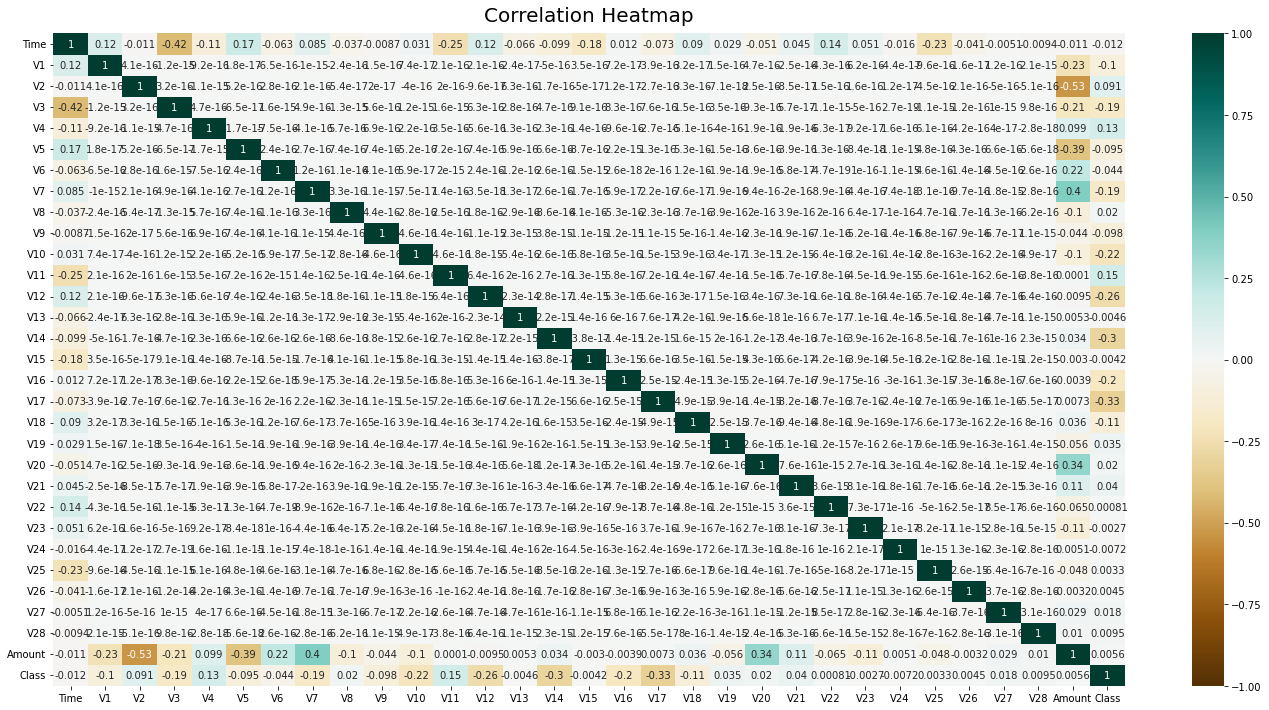

In [ ]:
corr = credit_df.corr()
plt.figure(figsize=(24, 12))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True,cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);

# Sepearting the classes

In [ ]:
Normal_df = credit_df[credit_df['Class']==0]
Normal_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
Fraud_df = credit_df[credit_df['Class']==1]
Fraud_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


# Some Statistical Analysis

In [ ]:
Normal_df.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
Fraud_df.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Comparing the Values for classes

In [ ]:
credit_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


We can see that Mean of all the columns for Normal Transactions is much less than Fraudulent Transactions.

# Under-Sampling 

One way to handle the imbalance dataset is undersampling which we are going to perform now.

Bulid a sample dataset containing same number of Normal and Fraudulent Transactions

Number of Fraudulent Transactions = 492

In [ ]:
Normal_sample = Normal_df.sample(n=492)
Normal_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
85622,60857.0,1.168583,0.304541,0.777882,1.115324,-0.398386,-0.392228,-0.115365,-0.015441,-0.258469,...,-0.016296,-0.025194,0.009569,0.323394,0.411683,-0.498742,0.035869,0.023349,5.00,0
36231,38446.0,-1.488603,-1.688302,1.032767,-1.317581,-1.598768,-0.414670,1.522180,-0.080488,1.355426,...,0.624583,0.963212,1.137088,0.330142,-0.253007,-0.832982,0.059958,0.247971,507.60,0
174472,121926.0,1.955222,-0.546860,-1.761651,-0.521705,1.696688,3.853013,-1.475745,1.139829,1.166602,...,-0.024383,-0.003512,0.336510,0.622691,-0.531277,0.394782,0.032038,-0.017112,4.12,0
21317,31596.0,-0.786522,1.098798,1.486425,1.150768,0.491374,-0.390073,1.924643,-1.740517,1.162279,...,-0.229701,0.673904,-0.352180,0.408717,-0.507237,-0.479830,-1.913052,-1.489964,46.82,0
6954,9038.0,-0.576646,0.363052,0.799349,-0.540667,-0.242577,1.244138,1.243837,-0.129046,1.484877,...,-0.239558,-0.174614,-0.160003,-1.274918,0.116972,1.138171,-0.069934,-0.032686,235.63,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265802,162055.0,1.801883,-0.529626,-0.398175,0.504669,-0.718666,-0.716806,-0.280893,-0.223493,1.021625,...,0.292713,0.871817,0.037362,0.106473,-0.128489,-0.262357,0.025122,-0.015567,106.72,0
150840,94057.0,1.984549,0.267650,-1.955637,1.276264,0.859853,-0.800603,0.602020,-0.345378,0.995017,...,0.075148,0.384207,-0.036224,0.680489,0.471032,-0.509163,-0.087179,-0.073113,36.00,0
30255,35841.0,0.918201,-0.611099,1.428266,1.672596,-1.100675,0.920387,-0.853663,0.418220,1.337493,...,-0.105027,-0.043862,-0.175851,0.026119,0.518471,-0.327299,0.077600,0.037477,93.54,0
136560,81763.0,1.179629,0.287902,0.430258,1.379275,-0.070253,-0.164196,0.111190,-0.057445,0.173824,...,-0.097340,0.011297,-0.064788,0.115812,0.692290,-0.314631,0.046366,0.016427,1.00,0


In [ ]:
from pandas.core.internals import concat
new_credit_df =  pd.concat([Normal_sample,Fraud_df],axis=0)

new_credit_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
85622,60857.0,1.168583,0.304541,0.777882,1.115324,-0.398386,-0.392228,-0.115365,-0.015441,-0.258469,...,-0.016296,-0.025194,0.009569,0.323394,0.411683,-0.498742,0.035869,0.023349,5.00,0
36231,38446.0,-1.488603,-1.688302,1.032767,-1.317581,-1.598768,-0.414670,1.522180,-0.080488,1.355426,...,0.624583,0.963212,1.137088,0.330142,-0.253007,-0.832982,0.059958,0.247971,507.60,0
174472,121926.0,1.955222,-0.546860,-1.761651,-0.521705,1.696688,3.853013,-1.475745,1.139829,1.166602,...,-0.024383,-0.003512,0.336510,0.622691,-0.531277,0.394782,0.032038,-0.017112,4.12,0
21317,31596.0,-0.786522,1.098798,1.486425,1.150768,0.491374,-0.390073,1.924643,-1.740517,1.162279,...,-0.229701,0.673904,-0.352180,0.408717,-0.507237,-0.479830,-1.913052,-1.489964,46.82,0
6954,9038.0,-0.576646,0.363052,0.799349,-0.540667,-0.242577,1.244138,1.243837,-0.129046,1.484877,...,-0.239558,-0.174614,-0.160003,-1.274918,0.116972,1.138171,-0.069934,-0.032686,235.63,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [ ]:
new_credit_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [ ]:
new_credit_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94319.349593,0.028906,-0.063199,0.070007,-0.004078,0.021494,-0.045938,0.068429,0.009694,0.091893,...,-0.009826,0.010626,-0.005099,0.003824,-0.021036,0.015465,-0.003837,0.002744,-0.018182,93.951301
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


## Split into Train and Test Data

In [ ]:
X = new_credit_df.drop(columns=['Class'],axis = 1)
y = new_credit_df['Class']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y , test_size = 0.25,random_state = 42)

X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
248971,154181.0,-0.549615,2.219075,-3.522024,0.236995,1.087469,-1.235530,-0.279313,0.514361,-1.849927,...,0.126518,0.364130,0.210428,-0.366019,0.015803,0.349212,0.647302,0.171929,0.117188,0.76
9252,13323.0,-5.454362,8.287421,-12.752811,8.594342,-3.106002,-3.179949,-9.252794,4.245062,-6.329801,...,1.305862,1.846165,-0.267172,-0.310804,-1.201685,1.352176,0.608425,1.574715,0.808725,1.00
191000,129068.0,1.562605,-1.280361,0.699755,1.775694,-1.480867,1.172497,-1.450585,0.565138,2.310284,...,-0.052118,0.216979,0.837245,-0.034367,-0.328900,-0.197501,-0.484480,0.099727,-0.010072,140.00
177195,123078.0,-1.073820,0.415616,-2.273977,1.536844,-0.758697,-1.670381,-2.377140,0.090370,0.004847,...,0.227051,0.535542,0.863592,0.450743,-0.144228,-0.205609,-0.539073,0.503418,-0.237807,11.00
91628,63560.0,-0.684648,1.287013,0.536862,-0.137373,0.286900,-0.065829,0.307030,0.536346,-0.531205,...,0.034561,-0.240299,-0.732009,-0.005749,-0.817529,-0.088193,0.155316,0.132133,0.024569,16.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136420,81699.0,1.163423,0.203428,0.377878,0.646422,-0.489494,-0.873811,-0.032342,-0.037095,-0.143649,...,-0.081340,-0.219077,-0.743514,0.133883,0.478356,0.129920,0.064614,-0.034365,0.024463,19.99
221862,142728.0,-0.443177,1.015020,-0.349551,0.123434,1.768560,-0.425493,1.615046,-0.370257,-0.670636,...,-0.113430,0.115133,0.466067,-0.433316,-1.028329,0.341297,-0.506957,0.015903,0.194750,33.66
189587,128471.0,0.909124,1.337658,-4.484728,3.245358,-0.417809,-0.762119,-2.506349,0.694164,-0.467556,...,0.445573,0.586829,0.594078,-0.252120,0.325439,0.562766,-0.256278,0.652674,0.319879,67.90
19558,30377.0,1.199721,-0.591479,0.117232,-0.396534,-1.020310,-0.859557,-0.495375,-0.058746,-0.847025,...,0.206024,0.020967,-0.126724,-0.053386,0.466651,0.381202,-0.337509,0.003029,0.041011,80.08


In [ ]:
y_train

248971    1
9252      1
191000    0
177195    1
91628     0
         ..
136420    0
221862    0
189587    1
19558     0
217605    0
Name: Class, Length: 738, dtype: int64

## Model Training

### Logistic Regression Model

In [ ]:
Logistic_Regression = LogisticRegression()

Trainig dataset by (X_train,y_train)

In [ ]:
Logistic_Regression.fit(X_train,y_train)

LogisticRegression()

#### Evaluation 

Accuracy Score

In [ ]:
# Accuracy on Train data
train_pred = Logistic_Regression.predict(X_train)
train_accuracy = accuracy_score(y_train,train_pred)

print("Accuracy on Training Data is: ",round(train_accuracy*100,2)," %")

Accuracy on Training Data is:  94.58  %


In [ ]:
# Accuracy on Test data
test_pred = Logistic_Regression.predict(X_test)
test_accuracy = accuracy_score(y_test,test_pred)

print("Accuracy on Testing Data is: ",round(test_accuracy*100,2)," %")

Accuracy on Testing Data is:  92.28  %


In [ ]:
# Accuracy on credit Dataset
credit_pred = Logistic_Regression.predict(credit_df.drop(columns = ['Class'],axis =1))
credit_accuracy = accuracy_score(credit_df['Class'],credit_pred)

print("Accuracy on Credit Data is: ",round(credit_accuracy*100,2)," %")

Accuracy on Credit Data is:  95.77  %


In [ ]:
# The Classification Report
from sklearn.metrics import classification_report
print(classification_report(credit_df['Class'], credit_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    284315
           1       0.04      0.92      0.07       492

    accuracy                           0.96    284807
   macro avg       0.52      0.94      0.52    284807
weighted avg       1.00      0.96      0.98    284807



#Over-Sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler